# Regression

- Choosing	loss	functions
- Optimizers	in	TensorFlow
- Reading	from	CSV	files	and	preprocessing	data
- House	price	estimation-simple	linear	regression
- House	price	estimation-multiple	linear	regression
- Logistic	regression	on	the	MNIST	dataset

Is powerful tools for mathematical modelling, classification, and prediction. It allows us to make predictions from data by learning the relationship between the dependent and independent variables. For example is house price estimation, we determine the relationship between area of house<b>(Independent Variable)</b> and int price<b>(Dependent Variable)</b>.

## Linear Regression

One of most widely technique, that assumes a linear relationship between the input variables(X) and the singe output variable(Y). 

## Logistic Regression

Is used to determine the probably  of an event.

# Linear Regression Model

In [12]:
import tensorflow as tf

In [13]:
# Placeholder for the training data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# variables for coefficients initialized to 0
w0 = tf.Variable(0.0)
w1 = tf.Variable(0.0)

# The liear regressio model
Y_that = X*w1 + w0

# loss function
loss = tf.square(Y - Y_that, name='loss')

print(loss)

Tensor("loss_1:0", dtype=float32)


## Multiple Linear Regression

This method are used while the input variables are more than one, while the ouput variable remains one.

In [14]:
m = 1000
n = 15
P = 2

# placeholder for the Training Data
# m = number of samples; n = number of features.
X = tf.placeholder(tf.float32, name='X', shape=[m,n])
Y = tf.placeholder(tf.float32, name='Y')

# Variable for Coefficient initialized to 0
w0 = tf.Variable(0.0)
w1 = tf.Variable(tf.random_normal([n, 1]))

# The Linear Regression Model
Y_hat = tf.matmul(X, w1) + w0

# Multiple linear regression loss function
loss = tf.reduce_mean(tf.square(Y - Y_hat, name='loss'))

print(loss)

Tensor("Mean:0", shape=(), dtype=float32)


## Logistic Regression

In this method 'loss()' function is defined by cross-entropy. Now output <i><b>'y'</b></i> will have dimensions equal to the number of classes in the training datasets. With <i><b>'p'</b></i> numbers of classes, we will have following :

In [15]:
# Placeholder for the training Data
X = tf.placeholder(tf.float32, name='X', shape=[m, n])
Y = tf.placeholder(tf.float32, name='Y', shape=[m, P])

# Variable for coefficients initiliazed to 0
w0 = tf.Variable(tf.zeros([1, P]), name='bias')
w1 = tf.Variable(tf.random_normal([n, 1]), name='weights')

# The Linear Regression Model
Y_hat = tf.matmul(X, w1) + w0

# Loss Function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=Y_hat, labels=Y)
loss = tf.reduce_mean(entropy)

print(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Tensor("Mean_1:0", shape=(), dtype=float32)


# Getting Ready

W = Weight <br>
b = biass

Thats is done proportionally to the negative of the gradient of the '.loss()' function. gradient descent have three variations depending on the size of the training sample :

- Vanila Gradient Descent or Batch Gradient Descent

is the gradient of the '.loss()' function is <b>calculated for the entire training set at each epoch</b>. but its slw and can be use to large datasets.

- Stochastic Gradient Descent

One training samples is presented at time, <b>Weight and biases are updated such that the gradien</b>t '.loss()' function decreases, and next to training sample. <b>Its faster than Vanila, but at the same time due to frequent updates, there can be a high variance in the '.loss()' function</b>.

- Mini-batch Gradient Descent

This combine the best qualities of both gradient descent, <b>The parameters are updated for a batch of the training sample</b>.

# How to Do it ...?

In [5]:
import tensorflow as tf
# deciding optimizer that we want, bellow used most popular 
# and simple one .GradientDescentOptimizer()
tf.train.GradientDescentOptimizer(learning_rate)           # learning_rate = constant or tensor


# To told about the function to be optimized, thats using method 'minimize'
# This method computes the gradients and applies the gradients and applies to coefficient
minimize(
    lloss,
    gobal_step=None,
    var_list=None,
    gate_gradients=GATE_OP,
    aggregation_method=None,
    colocate_gradients_with_ops=False,
    name=None,
    grad_loss=None
)


# Combining it all and define the computational graph
...
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(LOSS_FUNCTION)
train_step = optimizer.minimize(loss)
...

# Execution Graph
with tf.Session() as sess:
    ...
    # Feeding the data (X and Y) to '.feed_dict()' can be single X and Y points(Stohastic Gradient)
    # the entire training set(vanila) or batch
    sess.run(train_step, feed_dict = {X:x_data, Y:Y_data})
    ...
    
# OPTIMIZER
    
# Using optimizer 'tf.train.MomentumOptimizer()'
# t takes both 'learning_rate' and 'mlomentum' as '.init()' arguments
optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.05).minimize(LOSS_FUNCTION)


# another Optimizer is '.AdadeltaOptimizer()'
# adaptive and monotomically decreasing 'learning_rate'
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.8, rho=0.95).minimize(LOSS_FUNCTION)


# TF also support Hinton'sRMSprop, wich work similarly '.AdadeltaOptimizer()'
optimizer = tf.train.RMSpropOptimizer(learning_rate=0.01, decay=0.8, momentum=0.05).minimize(LOSS_FUNCTION)


# Another popular optimizer supportes by tensorflow is '.AdamOptimizer()'
optimizer = tf.train.AdamOptimizer().minimize(LOSS_FUNCTION)

# Another TensorFlow optimizer :
tf.train.AdagradOptimizer()                      # Adagrad Optimizer
tf.train.AdagradDAOptimizer()                    # Adagrad Dual Averaging Optimizer
tf.train.FtrlOptimizer()                         # Followthe regulazed leader optimizer
tf.train.ProximalGradientDescentOptimizer()      # Proximal GD Optimizer
tf.train.ProximalAdagradOptimizer()              # PRoximal Adagrad Optimizer


# Real Optimizer Implementation

In [1]:
%matplotlib notebook
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize(X):
    mean = np.mean(X),
    std = mp.std(X),
    X = (X - mean) / std
    return X

In [3]:
# load Data
boston = tf.contrib.learn.datasets.load_dataset('boston')
X_train, Y_train = boston.data[:,5], boston.target

Instructions for updating:
Please use tf.data.
Instructions for updating:
Use scikits.learn.datasets.
Instructions for updating:
Use tf.data instead.


In [4]:
n_samples = len(X_train)
# print(n_sample)

In [5]:
# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

# Variables for coefficints initialized to 0
b = tf.Variable(0.0)
w = tf.Variable(0.0)

In [6]:
# The Linear Regression Model
Y_hat = X * w + b

In [7]:
# Loss function
loss = tf.square(Y - Y_hat, name='loss')

# Gradient descet with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01). minimize(loss)

# Initializing Optimizer
init_op = tf.global_variables_initializer()
total = []

In [8]:
# Build Computational Graph
with tf.Session() as sess:
    # Initialize variable
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs', sess.graph)
    
    # Train the model for 100 epochs
    for i in range(100):
        total_loss = 0
        for x,y in zip(X_train, Y_train):
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += l
            
        total.append(total_loss / n_samples)
        print('Epoc {0}: Loss {1}'.format(i, total_loss / n_samples))
        
    writer.close()
    
    b_value, w_value = sess.run([b, w])
    

Y_pred = X_train * w_value + b_value
print('Done')

Epoc 0: Loss 26.779894071976642
Epoc 1: Loss 25.53296461714841
Epoc 2: Loss 25.308104233674545
Epoc 3: Loss 25.10842954612061
Epoc 4: Loss 24.930981247406574
Epoc 5: Loss 24.77316628481939
Epoc 6: Loss 24.632697901474653
Epoc 7: Loss 24.507565171966196
Epoc 8: Loss 24.395997446244344
Epoc 9: Loss 24.296438073398562
Epoc 10: Loss 24.207510506960208
Epoc 11: Loss 24.128008759568676
Epoc 12: Loss 24.056862049571265
Epoc 13: Loss 23.993132328883206
Epoc 14: Loss 23.935986277093452
Epoc 15: Loss 23.884696453991495
Epoc 16: Loss 23.838607984414683
Epoc 17: Loss 23.7971548808885
Epoc 18: Loss 23.759828056065572
Epoc 19: Loss 23.726180196874928
Epoc 20: Loss 23.695818979197572
Epoc 21: Loss 23.66839208922931
Epoc 22: Loss 23.643587806023984
Epoc 23: Loss 23.62113059121544
Epoc 24: Loss 23.600777718472052
Epoc 25: Loss 23.582306250110783
Epoc 26: Loss 23.56553214154635
Epoc 27: Loss 23.550278673170382
Epoc 28: Loss 23.53639172990574
Epoc 29: Loss 23.523735033295896
Epoc 30: Loss 23.512192511507

<IPython.core.display.Javascript object>


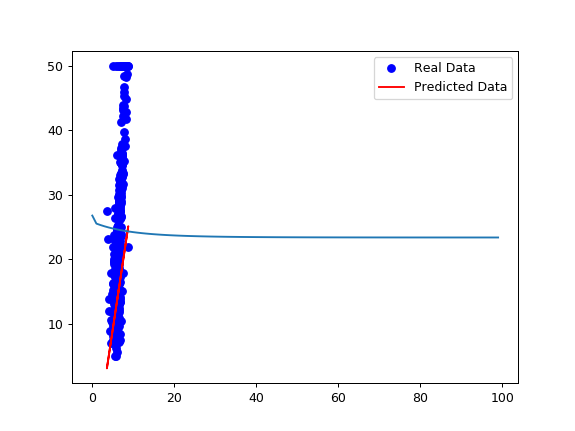

In [9]:
# printout the Plot
plt.plot(X_train, Y_train, 'bo', label="Real Data")
plt.plot(X_train, Y_pred, 'r', label="Predicted Data")
plt.legend()
plt.show()

plt.plot(total)
plt.show()